In [1]:
import numpy as np
import pandas as pd
import vtk
import pyvista as pv
import scipy.io
import sys
import os

In [2]:
fileList = os.listdir()
mfiles = [i for i in fileList if i.endswith('.m') == True]
stlfiles = [i for i in fileList if i.endswith('.stl') == True]
stlfiles

['CoronaryArteryBranch.stl']

In [3]:
from stl import mesh

your_mesh = mesh.Mesh.from_file(stlfiles[0])
my_mesh = pv.PolyData(stlfiles[0])

In [4]:
x, y, z = your_mesh.v0, your_mesh.v1, your_mesh.v2

In [5]:
P1, P2, P3 = np.array([5, 0, 0]), np.array([0, 0, 5]), np.array([10, 0, 5])

In [6]:
def computeNormals(P1, P2, P3):
    top = np.cross((P2-P1), (P3-P1))
    return top / np.sqrt(np.dot(top, top))


## Answer to Question 1
computeNormals(P1, P2, P3)

array([0., 1., 0.])

In [7]:
norms = []

i = 0
while i < len(x)-2:
    norm = computeNormals(x[i], y[i], z[i])
    norms.append(norm)
    i += 1

In [11]:
## My Normals

norms = np.array(norms)
norms

array([[ 0.5417226 ,  0.36500087, -0.7571731 ],
       [ 0.52541953,  0.30942684, -0.792584  ],
       [ 0.6687237 ,  0.22316495, -0.7092291 ],
       ...,
       [-0.96923214, -0.22684093,  0.095562  ],
       [-0.96922874, -0.22686315,  0.09554455],
       [-0.9692334 , -0.22683306,  0.09556833]], dtype=float32)

In [10]:
## Checking Normals with computed normals

my_mesh.face_normals

pyvista_ndarray([[ 0.5417226 ,  0.36500084, -0.75717306],
                 [ 0.5254196 ,  0.3094268 , -0.79258394],
                 [ 0.6687237 ,  0.22316498, -0.7092291 ],
                 ...,
                 [-0.96923345, -0.22683308,  0.09556834],
                 [-0.96911603, -0.22708522,  0.09615838],
                 [-0.96969414, -0.2258367 ,  0.09322559]], dtype=float32)

In [12]:
## Add my Normals to the mesh
my_mesh.add_field_array(norms, 'myNorms')

In [299]:
## Export the Mesh as a .vtk file
my_mesh.save('my_mesh.vtk')

## Curve Fitting

## Part 1

In [14]:
energy = np.array([15.4, 16.7, 18.6, 19.8, 22.7, 26.6, 29.5])
temp = np.array([-40, -20, 0, 20, 25, 40, 60])

In [15]:
fit = np.polyfit(temp, energy, 3)

In [16]:
def E(T):
    return fit[3] + fit[2]*T + fit[1]*T**2 + fit[0]*T**3

In [17]:
## Below we can see the interpolated value for the fit at RT
E(38.5)

25.09347942055084

In [203]:
import matplotlib.pyplot as plt

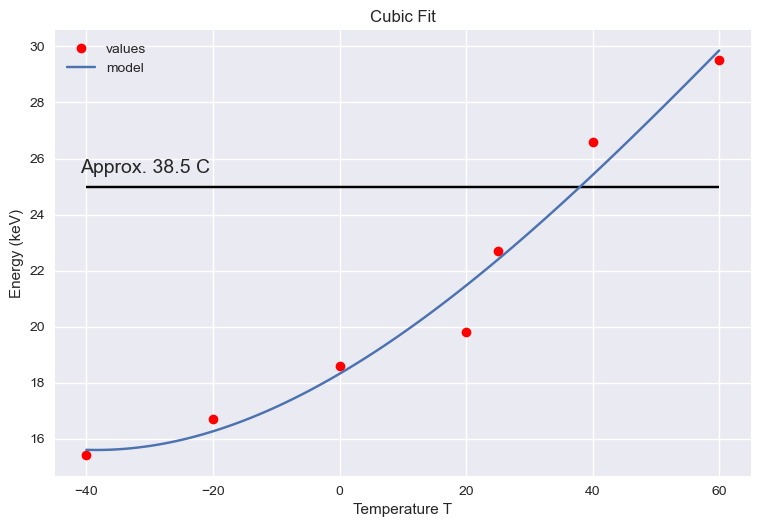

In [213]:
plt.plot(temp, energy,'ro', np.linspace(-40, 60, 100), E(np.linspace(-40, 60, 100)))
plt.xlabel('Temperature T')
plt.ylabel('Energy (keV)')
plt.legend(['values', 'model'])
plt.title('Cubic Fit');
plt.style.use('seaborn')
plt.hlines(y = 25, xmin=-40, xmax=60)
plt.annotate("Approx. 38.5 C", xy = (-41, 25.5))
plt.savefig('Cubic_Fit.png')

## Part 3

In [210]:
A = np.array([[1, -40], [1, -20], [1, 0], [1, 20], [1, 25], [1, 40], [1, 60]])
b = np.array([15.4, 16.7, 18.6, 19.8, 22.7, 26.6, 29.5])

linearfit = np.polyfit(temp, energy, 1)
linearfit

array([ 0.14383317, 19.58202582])